# 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  !ls -la "/content/drive/MyDrive/darknet"

total 28
drwx------ 2 root root 4096 Jul 26 00:23 backup
drwx------ 2 root root 4096 Jul 26 00:23 bin
drwx------ 2 root root 4096 Jul 26 00:23 cfg
drwx------ 2 root root 4096 Jul 26 00:23 cuDNN
drwx------ 2 root root 4096 Jul 26 00:23 custom
drwx------ 2 root root 4096 Jul 26 00:23 data
drwx------ 2 root root 4096 Jul 26 00:23 weights


In [ ]:
!ls -la /usr/local/cuda/include/cudnn.h

ls: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory


# 2. Install CUDA related modules, cuDNN

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [ ]:
!tar -xzvf /content/drive/MyDrive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

tar (child): /content/drive/MyDrive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
cat: /usr/local/cuda/include/cudnn.h: No such file or directory


## 3. Load DarkNet

In [ ]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [ ]:
!ls -la '/content/drive/MyDrive/darknet/bin/darknet'

!cp /content/drive/MyDrive/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 3213624 Dec 22  2020 /content/drive/MyDrive/darknet/bin/darknet


# 4. Test Yolo

In [ ]:
!cp -r '/content/drive/MyDrive/darknet/weights' .
!cp -r '/content/drive/MyDrive/darknet/cfg' .
!cp -ar '/content/drive/MyDrive/darknet/data' .
%ls

cfg/  darknet*  data/  weights/


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

      
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

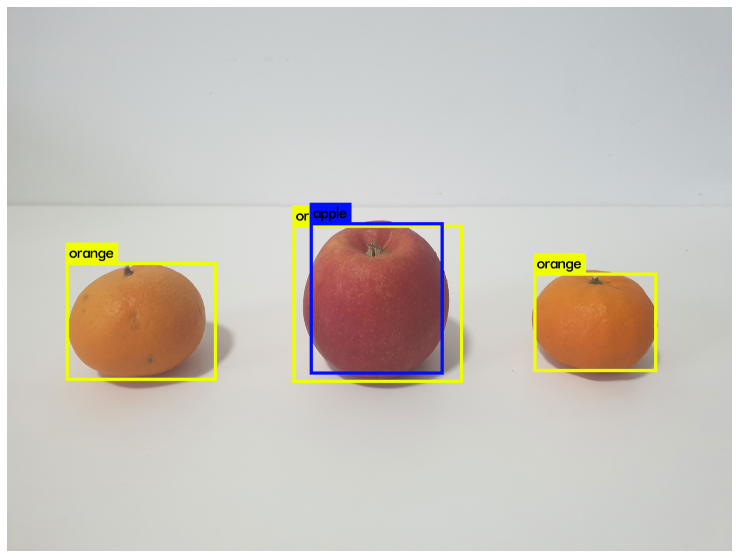

In [ ]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/fruit10.jpg
imShow('predictions.jpg')

# 5. Custom Yolo

In [ ]:
!cp -r "/content/drive/MyDrive/darknet/custom" .

### 아래를 누르면 아주 긴 시간 동안 학습하게 됨


In [ ]:
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg weights/darknet53.conv.74 -dont_show 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Loaded: 0.000036 seconds

 2535: 0.298334, 0.172131 avg loss, 0.001000 rate, 5.290499 seconds, 81120 images
Loaded: 0.000035 seconds

 2536: 0.258124, 0.180730 avg loss, 0.001000 rate, 5.300486 seconds, 81152 images
Loaded: 0.000040 seconds

 2537: 0.220154, 0.184673 avg loss, 0.001000 rate, 5.278189 seconds, 81184 images
Loaded: 0.000043 seconds

 2538: 0.182760, 0.184481 avg loss, 0.001000 rate, 5.293561 seconds, 81216 images
Loaded: 0.000040 seconds

 2539: 0.142511, 0.180284 avg loss, 0.001000 rate, 5.292803 seconds, 81248 images
Loaded: 0.000038 seconds

 2540: 0.223944, 0.184650 avg loss, 0.001000 rate, 5.291683 seconds, 81280 images
Resizing
384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000044 seconds

 2541: 0.144997, 0.180685 avg loss, 0.001000 rate, 2.167478 seconds, 81312 images
Loaded: 0.000039 seconds

 2542: 0.161134, 0.178730 avg loss, 0.001000 rate, 2.262274 seconds, 81344 images
Loa

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_last.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_final.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_4000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_3000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_2000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_1000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
if os.path.exists('./backup'):
    !cp -r ./backup "/content/drive/MyDrive/darknet"  

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/drive/MyDrive/darknet/backup/custom-train-yolo_final.weights" ./backup

In [ ]:
!ls -al ./backup

total 1443344
drwxr-xr-x 2 root root      4096 Jul 27 04:02 .
drwxr-xr-x 8 root root      4096 Jul 27 04:14 ..
-rw-r--r-- 1 root root 246326928 Jul 27 01:14 custom-train-yolo_1000.weights
-rw-r--r-- 1 root root 246326928 Jul 27 02:09 custom-train-yolo_2000.weights
-rw-r--r-- 1 root root 246326928 Jul 27 03:05 custom-train-yolo_3000.weights
-rw-r--r-- 1 root root 246326928 Jul 27 04:02 custom-train-yolo_4000.weights
-rw-r--r-- 1 root root 246326928 Jul 27 04:02 custom-train-yolo_final.weights
-rw-r--r-- 1 root root 246326928 Jul 27 04:02 custom-train-yolo_last.weights


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

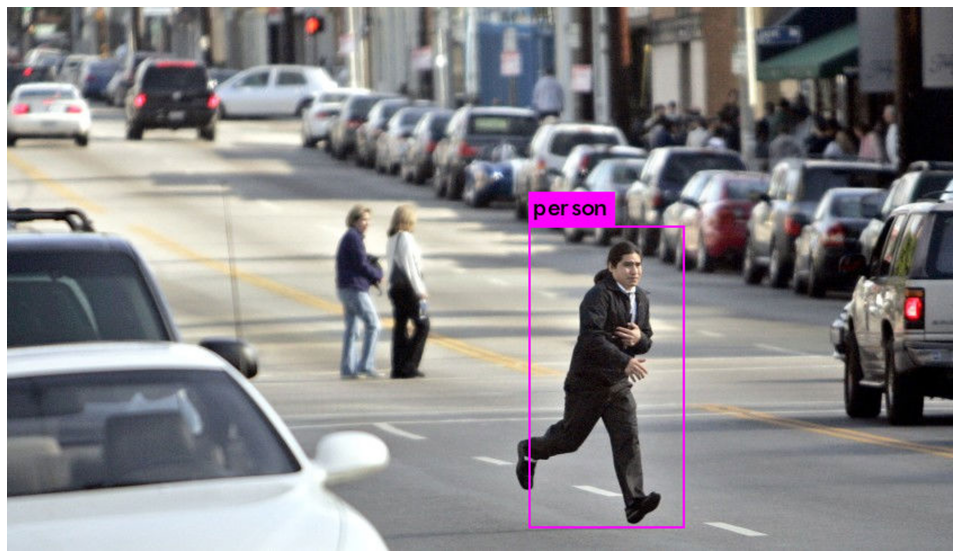

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_final.weights data/Jaywalking25.jpg -dont-show

imShow('predictions.jpg')